In [289]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftshift

### Таблица исходных данных с гироскопа   

In [290]:
df_gyro = pd.read_csv("gyro_data.csv")
df_gyro

,gyro_x,gyro_y,gyro_z
0,-0.010174,0.022502,-0.000522
1,0.008148,-0.028474,-0.006978
2,-0.002898,0.023201,0.009662
3,-0.002744,-0.011388,-0.007823
4,0.010530,-0.003039,0.003586
...,...,...,...
9751,0.001818,-0.004874,-0.008305
9752,-0.007095,0.005194,0.002707
9753,0.008883,-0.003179,0.005211
9754,-0.006830,-0.001000,-0.010581


## Визуализация исходных сигналов

In [291]:
def printSignal(sig, N, name):
    # Plot results
    fig = plt.figure(figsize=(16, 5), dpi=100)
  
    plt.title(f'Signal {name}')
    plt.plot(sig)
    plt.xlim([0, N-1])
    plt.xlabel('samples')
    plt.grid()

### Угол поворота по оси Х

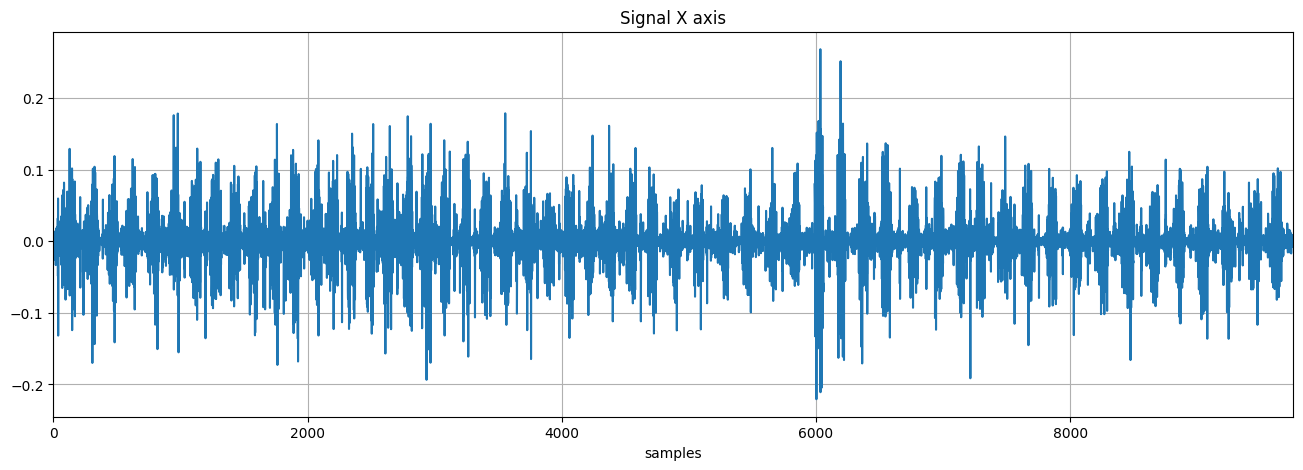

In [292]:
N = df_gyro['gyro_x'].count() #random sequence length
gyro_x = df_gyro['gyro_x'].to_numpy()
printSignal(gyro_x, N, 'X axis')

### Угол поворота по оси Y

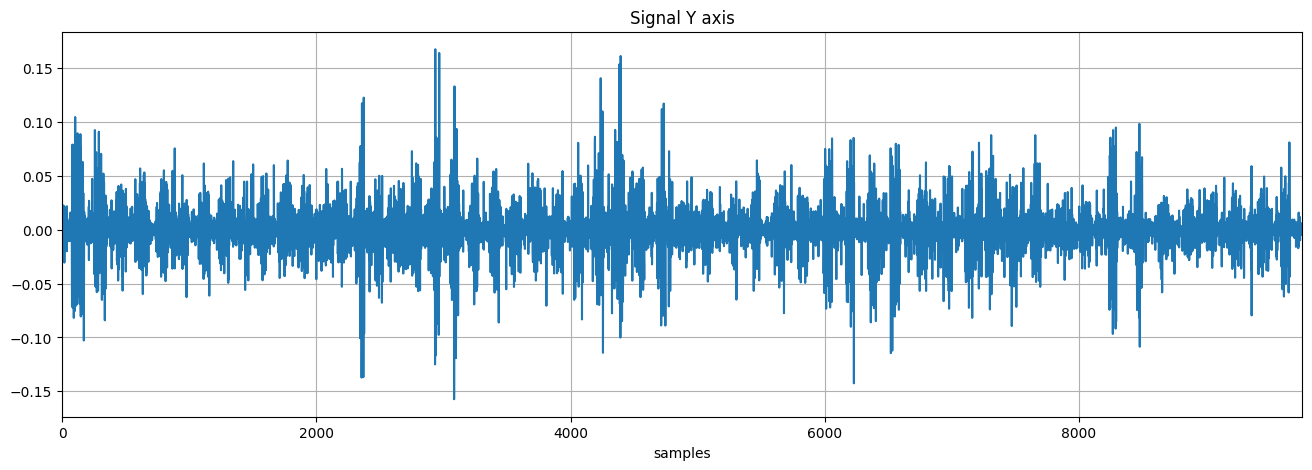

In [293]:
gyro_y = df_gyro['gyro_y'].to_numpy()
printSignal(gyro_y, N, 'Y axis')

### Угол поворота по оси Z

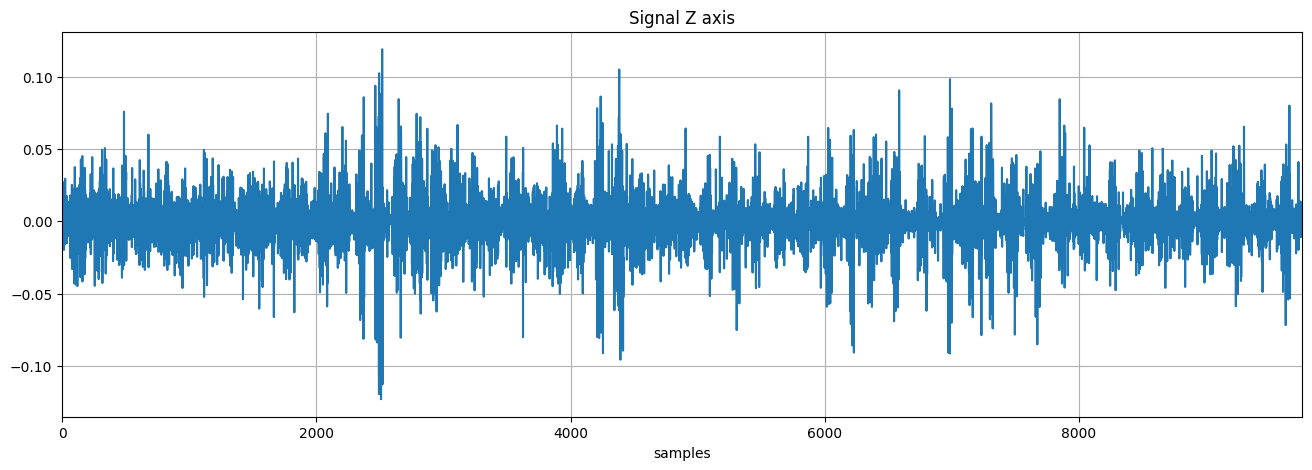

In [294]:
gyro_z = df_gyro['gyro_z'].to_numpy()
printSignal(gyro_z, N, 'Z axis')

Видно, что при отстутствии воздействия на гироскоп, сигнал с датчиков ненулевой, а имеет вид случайной функции. 

## Определение характеристик случайного процесса
Плотность вероятности случайного сигнала позволяет определить математические моменты разного порядка:

- **Математическое ожидание**: среднее значение последовательности случайных величин

Для вычисления математического ожидания воспользуемся метод `mean()`

- **Дисперсия**: среднее значение квадратов разностей между значениями последовательности и её средним значением

Для вычисления дисперсии воспользуемся методом - `var()`, а для поиска среднеквадратического отклонения методом - `std()`.

### Функция плотности вероятности

In [295]:
def printPDF(sig, N, name):
    s = sig.var()
    mu = sig.mean()
    
    fig = plt.figure(figsize=(16, 5), dpi=100)
    plt.title(f'Probability density function {name}')
    plt.xlabel('Value')
    plt.ylabel('Level')
    plt.hist(sig, 50,color='C1', label=r'$\mu = %f, \sigma$ = %f' % (mu, s))
    plt.grid()
    plt.legend(loc='upper left', fontsize=16)

### Гистограмма плотности вероятности для оси Х

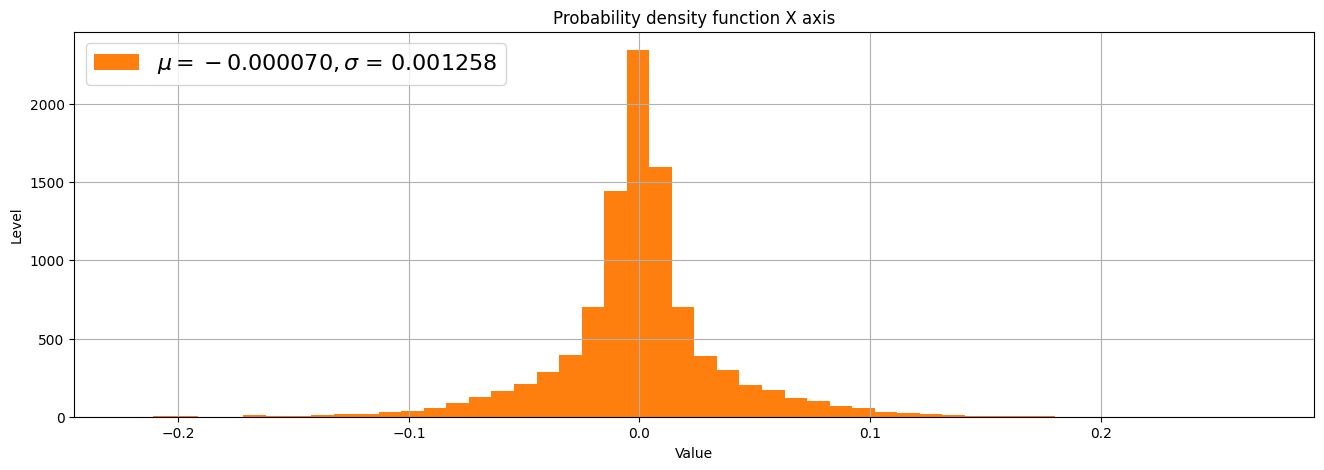

In [296]:
printPDF(gyro_x, N, 'X axis')

### Гистограмма плотности вероятности для оси Y

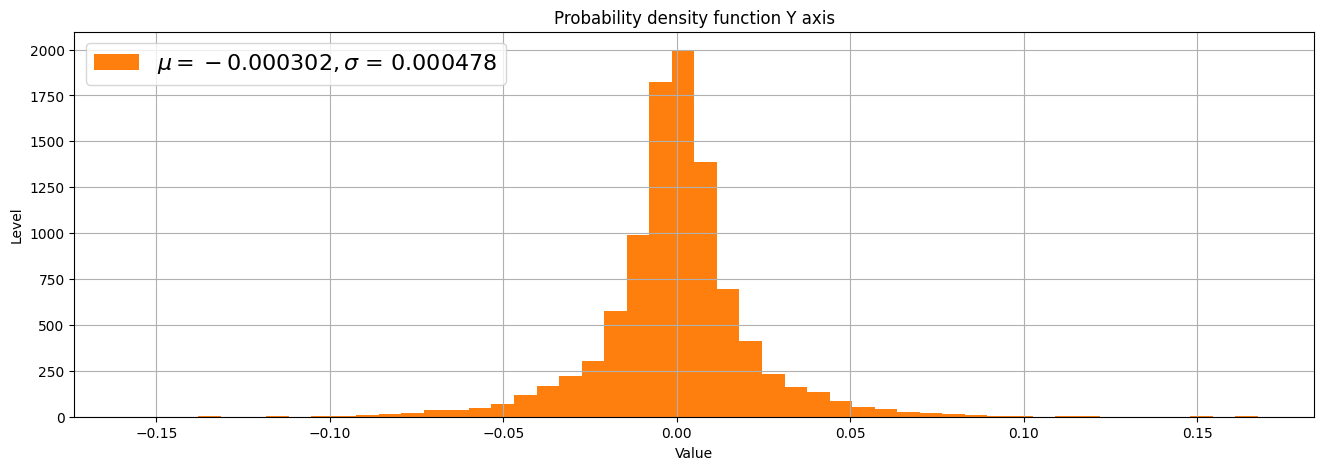

In [297]:
printPDF(gyro_y, N, 'Y axis')

### Гистограмма плотности вероятности для оси Z

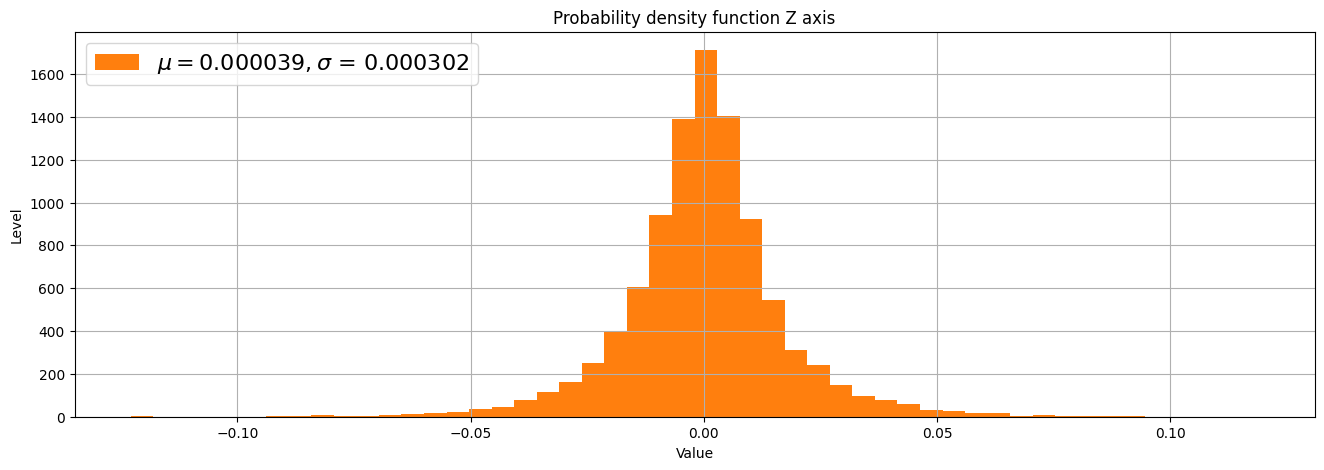

In [298]:
printPDF(gyro_z, N, 'Z axis')

Гистограммы показывают, что распределение сигналов близко к нормальному.

## Спектральная плотность мощности 

Мы можем рассматривать спектральную плотность мощности как меру скорости изменения случайного процесса.

В библиотеке **scipy** есть пакет **fftpack**, который содержит основные функции для вычисления ДПФ (в частности БПФ).

In [299]:
def calcFFT(sig, N):
    X = fft(sig)
    return 2*np.abs(X) / N

def printSpectrum(sig, N, name):
    X = calcFFT(sig, N)

    fig = plt.figure(figsize=(16, 5), dpi=100)
    plt.title(f'Spectrum {name}')
    plt.plot(X)
    plt.xlim([0, N//2-1])
    plt.xlabel('frequency')
    plt.grid()

### Спектральная плотность мощности для оси X

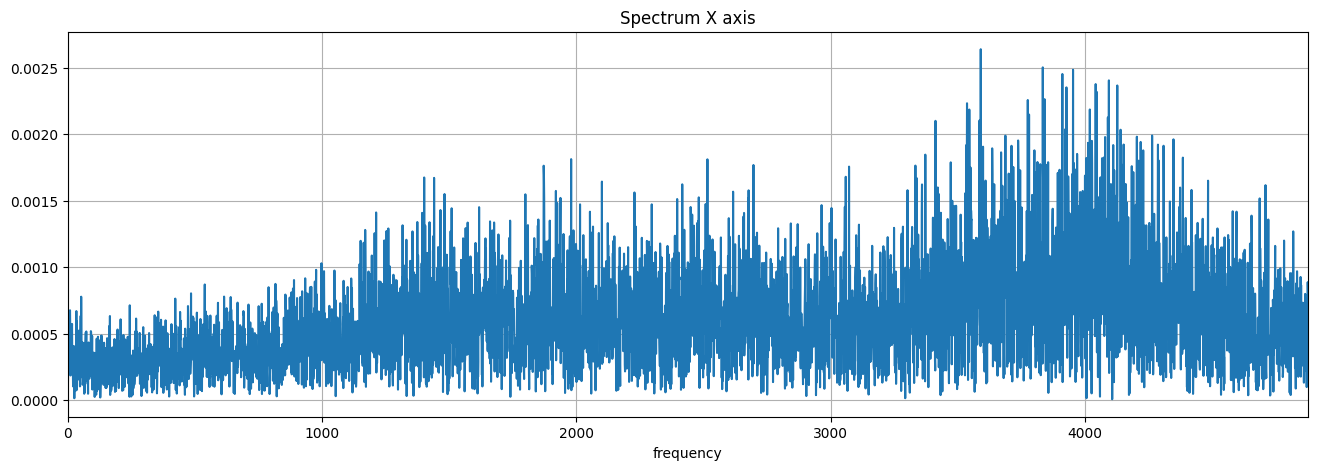

In [300]:
printSpectrum(gyro_x, N, 'X axis')

### Спектральная плотность мощности для оси Y

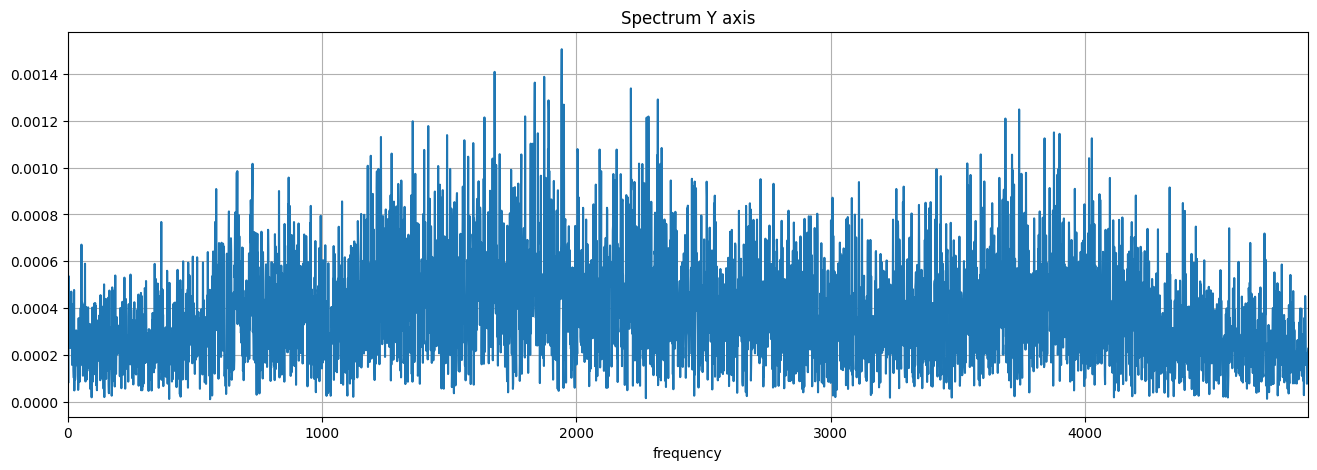

In [301]:
printSpectrum(gyro_y, N, 'Y axis')

### Спектральная плотность мощности для оси Z

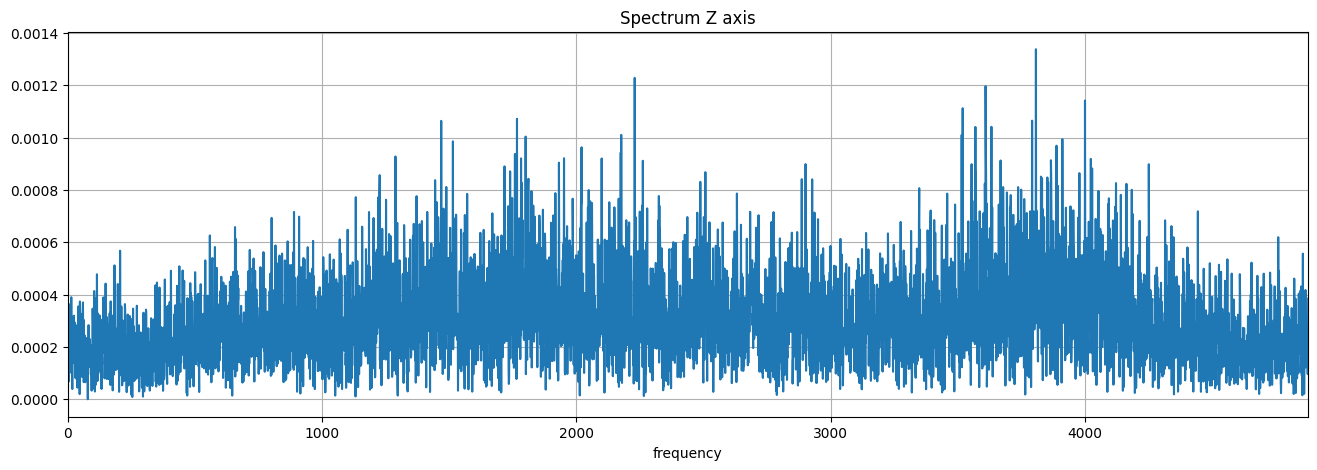

In [302]:
printSpectrum(gyro_z, N, 'Z axis')

Полученные характеристики позволяют определить следующее параметры, необходимые для последующей фильтрации сигнала:


- **Отклонение**


- **Меру скорости изменения**


- **Отношение сигнал/шум**


- **Динамический диапазон**: отношение минимального и максимального возможных значений величины входного параметра.


- **Чувствительность**: минимальный уровень сигнала на входе системы, при котором сигнал распознаётся на фоне шумов. 


Качественная фильтрация шума способна уменьшить погрешность и увеличить качество измерения датчика.